In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import analysis

In [3]:
result_summary = pd.read_csv("summary.csv").head()
result_summary

,datetime,run_name,run_config,loss,val_loss,rms_dev,mae,std_diff,output_file,run_time,note
0,2025-05-18 21:42,Normal,data/run/test.toml,data/result/2025-05-18 21:42_Normal/loss.dat,data/result/2025-05-18 21:42_Normal/val_loss.dat,5.004520,-2.372256,4.406543,data/result/2025-05-18 21:42_Normal/result.csv,0:21:04.154756,Base test
1,2025-05-19 06:48,Custom Model Checkpoint Monitor,data/run/test.toml,data/result/2025-05-19 06:48_Custom Model Chec...,data/result/2025-05-19 06:48_Custom Model Chec...,4.001656,0.430788,3.978401,data/result/2025-05-19 06:48_Custom Model Chec...,0:29:12.068107,Monitor loss


In [6]:
data = result_summary.loc[1, "output_file"]
df = pd.read_csv(data)
df

,param_1,param_2,param_3,param_4,param_5,param_6,param_7,param_8,param_9,param_10,target,prediction,difference
0,8.0,8.0,1.0,1.0,6.349604,22.223615,0.000000,0.250000,-118.0,-118.0,-2.688779,0.078865,-2.767644
1,9.0,8.0,-1.0,1.0,6.611489,21.779023,0.058824,0.242536,-117.0,-118.0,1.328922,1.899058,-0.570136
2,10.0,8.0,1.0,1.0,6.868285,21.367999,0.222222,0.235702,-116.0,-118.0,0.948460,0.740354,0.208106
3,11.0,8.0,-1.0,1.0,7.120367,20.986346,0.473684,0.229416,-115.0,-118.0,5.213544,4.391078,0.822466
4,12.0,8.0,1.0,1.0,7.368063,20.630576,0.800000,0.223607,-114.0,-118.0,3.233313,3.282857,-0.049544
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6420,245.0,110.0,-1.0,1.0,50.136295,1693.335703,51.338028,0.053074,119.0,-16.0,522.201200,527.039250,-4.838046
6421,246.0,110.0,1.0,1.0,50.230403,1691.748696,51.955056,0.053000,120.0,-16.0,529.713500,532.604860,-2.891358
6422,247.0,110.0,-1.0,1.0,50.324424,1690.167622,52.574230,0.052926,121.0,-16.0,537.315900,539.950900,-2.635028
6423,248.0,110.0,1.0,1.0,50.418356,1688.592441,53.195531,0.052852,122.0,-16.0,544.664900,545.717500,-1.052629


In [7]:
np.sqrt(np.mean(df["difference"] ** 2))

np.float64(4.001656419384533)

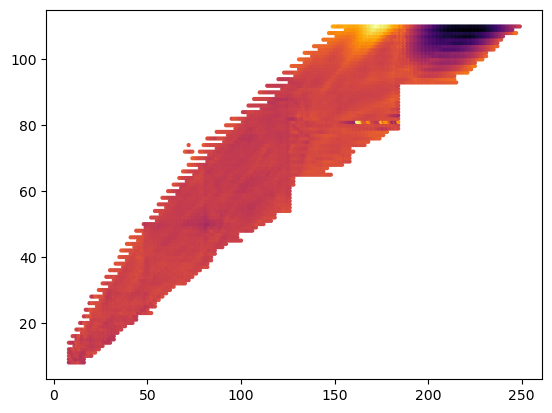

In [9]:
plt.scatter(df["param_1"], df["param_2"], c=df["difference"], s=4, cmap="inferno")